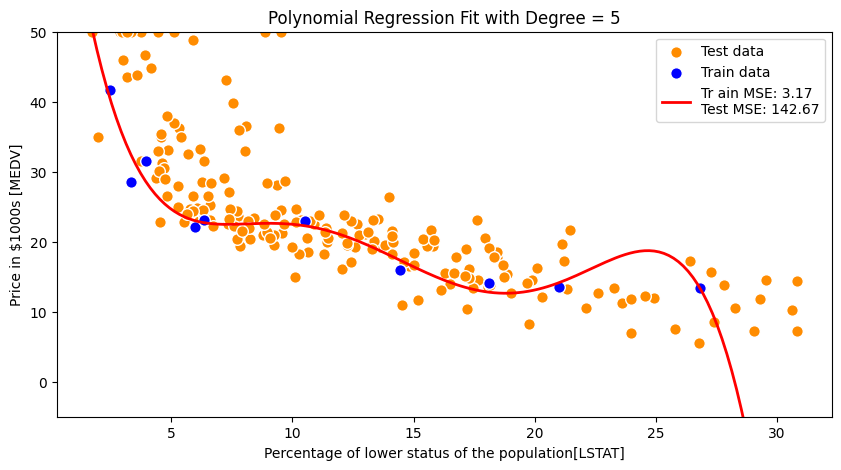

MSE of Training Data: 3.175
MSE of Testing Data: 142.674


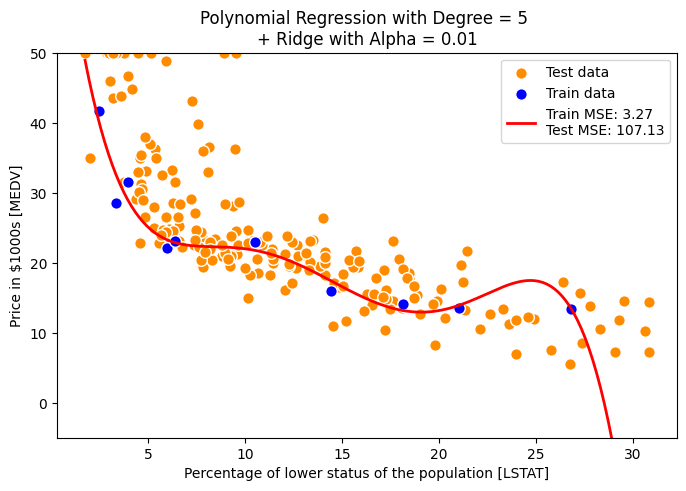

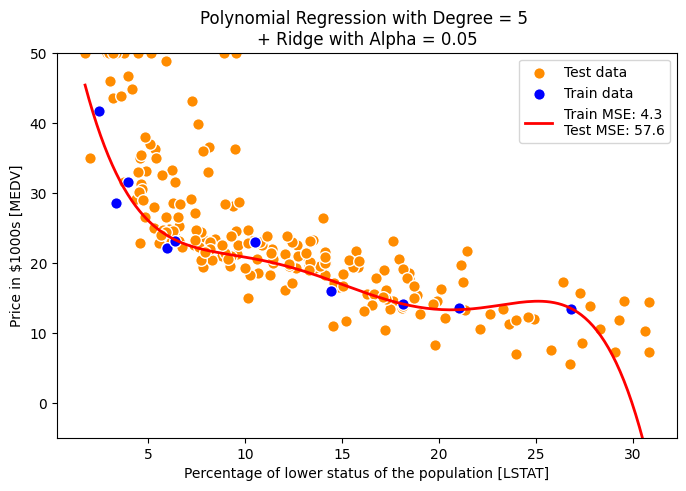

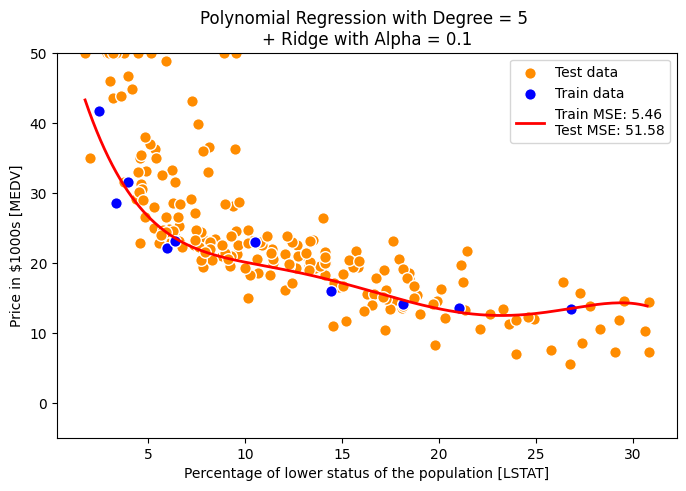

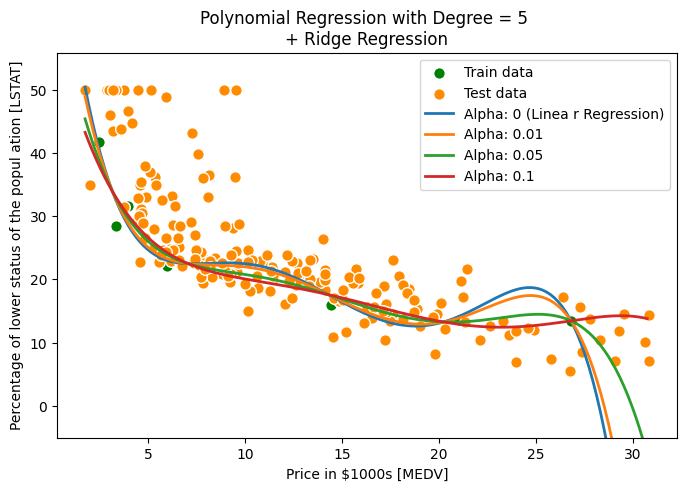

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
df = pd.read_csv(filepath_or_buffer=url, header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD'
, 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(5)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
RANDOM_STATE = 21
sample = 10
df_sample = df.sample(sample, random_state=RANDOM_STATE,
replace=False)
df_test = df.loc[~df.index.isin(df_sample.index)].sample(
200, random_state=RANDOM_STATE, replace=False)

degree = 5
poly = PolynomialFeatures(degree=degree)
X = df_sample[['LSTAT']].values
y = df_sample['MEDV'].values
X_test = df_test[['LSTAT']].values
y_test = df_test['MEDV'].values
X_fit = np.arange(min(X.min(), X_test.min()), max(X.max(), X_test.max()), 0.2)[:, np.newaxis]
X_poly = poly.fit_transform(X)
X_poly_test = poly.fit_transform(X_test)
regr = LinearRegression()
regr.fit(X_poly, y)
y_poly_fit = regr.predict(poly.fit_transform(X_fit)) 
y_pred = regr.predict(X_poly)

poly_mse = mean_squared_error(y, regr.predict(X_poly))
poly_mse_test = mean_squared_error(y_test, regr.predict(
X_poly_test))
plt.figure(figsize=(10,5))

plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
plt.scatter(X, y, c='blue', edgecolor='white', s=70, label='Train data')
plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Tr ain MSE: %s\nTest MSE: %s' % (round(poly_mse, 2), round( poly_mse_test, 2)))
plt.ylim(-5, 50)
plt.xlabel('Percentage of lower status of the population[LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.title("Polynomial Regression Fit with Degree = %s" % degree)
plt.legend()
plt.show()
print('MSE of Training Data: %.3f' % poly_mse)
print('MSE of Testing Data: %.3f' % poly_mse_test)

from sklearn.linear_model import Ridge
alphas = [0.01, 0.05, 0.1] 
for alpha in alphas:
    regr_ridge = Ridge(alpha=alpha) 
    regr_ridge.fit(X_poly, y)
    y_poly_fit = regr_ridge.predict(poly.fit_transform(X_fit))
    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
    plt.scatter(X, y, c='blue', edgecolor='white', s=70 , label='Train data')

    poly_mse = mean_squared_error(y, regr_ridge.predict (X_poly))
    poly_mse_test = mean_squared_error(y_test, regr_ridge.predict(X_poly_test))
    plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse,2), round(poly_mse_test, 2)))
    plt.xlabel('Percentage of lower status of the population [LSTAT]')
    plt.ylabel('Price in $1000s [MEDV]')
    plt.ylim(-5, 50)
    plt.title("Polynomial Regression with Degree = %s \n+ Ridge with Alpha = %s" % (degree, alpha)) 
    plt.legend()
    plt.show()


plt.figure(figsize=(8,5))
plt.scatter(X, y, c='green', edgecolor='white', s=70, label='Train data')
plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
regr = LinearRegression()
regr.fit(X_poly, y)
y_poly_fit = regr.predict(poly.fit_transform(X_fit)) 
plt.plot(X_fit, y_poly_fit, lw=2, label='Alpha: 0 (Linea r Regression)')

for alpha in alphas:
    regr_ridge = Ridge(alpha=alpha) 
    regr_ridge.fit(X_poly, y)
    y_poly_fit = regr_ridge.predict(poly.fit_transform( X_fit))
    plt.plot(X_fit, y_poly_fit, lw=2, label='Alpha: %s' % alpha)
    plt.ylim(-5)
    plt.ylabel('Percentage of lower status of the popul ation [LSTAT]')
    plt.xlabel('Price in $1000s [MEDV]')
     
plt.title("Polynomial Regression with Degree = %s \n+ Ridge Regression" % (degree))
plt.legend()
plt.show()



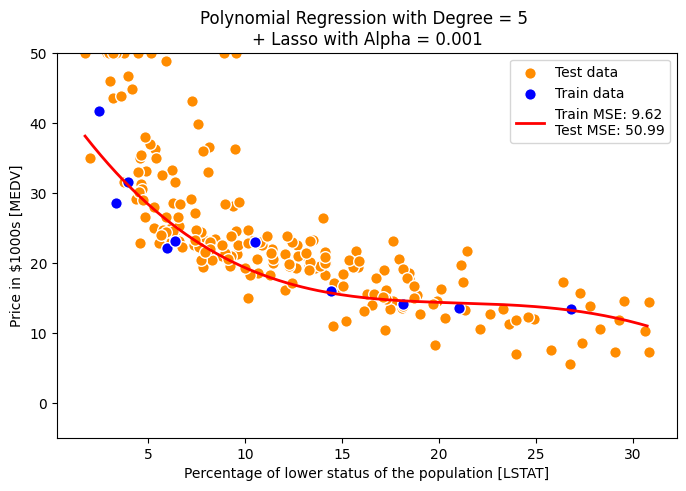

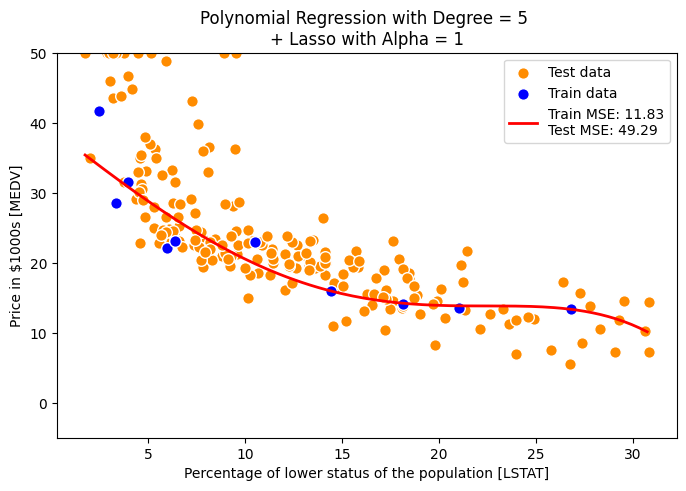

In [ ]:
from sklearn.linear_model import Lasso
alphas = [0.001, 1] 
for alpha in alphas:
    regr_ridge = Lasso(alpha=alpha) 
    regr_ridge.fit(X_poly, y)
    y_poly_fit = regr_ridge.predict(poly.fit_transform(X_fit))
    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
    plt.scatter(X, y, c='blue', edgecolor='white', s=70 , label='Train data')

    poly_mse = mean_squared_error(y, regr_ridge.predict (X_poly))
    poly_mse_test = mean_squared_error(y_test, regr_ridge.predict(X_poly_test))
    plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse,2), round(poly_mse_test, 2)))
    plt.xlabel('Percentage of lower status of the population [LSTAT]')
    plt.ylabel('Price in $1000s [MEDV]')
    plt.ylim(-5, 50)
    plt.title("Polynomial Regression with Degree = %s \n+ Lasso with Alpha = %s" % (degree, alpha)) 
    plt.legend()
    plt.show()

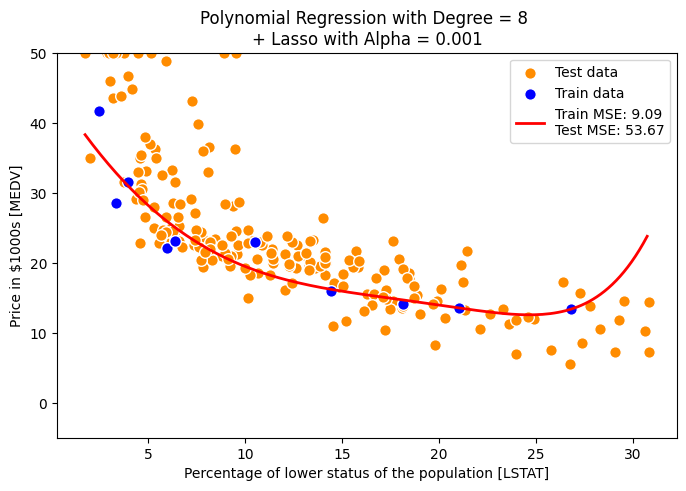

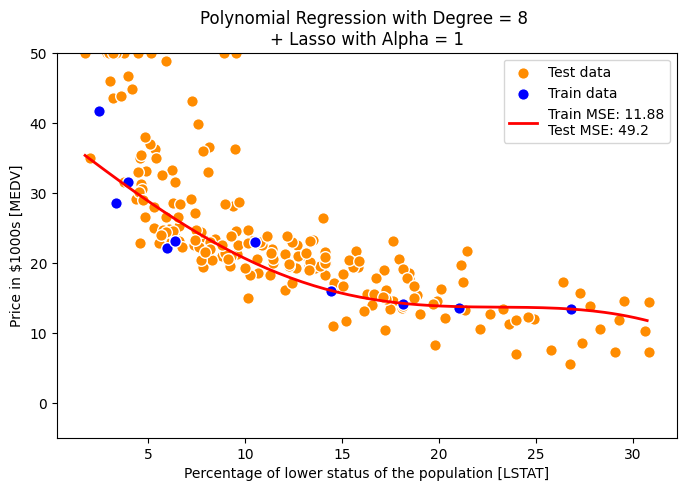

In [9]:
import pandas as pd
url = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
df = pd.read_csv(filepath_or_buffer=url, header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD'
, 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(5)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
RANDOM_STATE = 21
sample = 10
df_sample = df.sample(sample, random_state=RANDOM_STATE,
replace=False)
df_test = df.loc[~df.index.isin(df_sample.index)].sample(
200, random_state=RANDOM_STATE, replace=False)
#change degree 5 >> degree 8
degree = 8
poly = PolynomialFeatures(degree=degree)
X = df_sample[['LSTAT']].values
y = df_sample['MEDV'].values
X_test = df_test[['LSTAT']].values
y_test = df_test['MEDV'].values
X_fit = np.arange(min(X.min(), X_test.min()), max(X.max(), X_test.max()), 0.2)[:, np.newaxis]
X_poly = poly.fit_transform(X)
X_poly_test = poly.fit_transform(X_test)
regr = LinearRegression()
regr.fit(X_poly, y)
y_poly_fit = regr.predict(poly.fit_transform(X_fit)) 
y_pred = regr.predict(X_poly)

from sklearn.linear_model import Lasso
alphas = [0.001, 1] 
for alpha in alphas:
    regr_ridge = Lasso(alpha=alpha) 
    regr_ridge.fit(X_poly, y)
    y_poly_fit = regr_ridge.predict(poly.fit_transform(X_fit))
    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
    plt.scatter(X, y, c='blue', edgecolor='white', s=70 , label='Train data')

    poly_mse = mean_squared_error(y, regr_ridge.predict (X_poly))
    poly_mse_test = mean_squared_error(y_test, regr_ridge.predict(X_poly_test))
    plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse,2), round(poly_mse_test, 2)))
    plt.xlabel('Percentage of lower status of the population [LSTAT]')
    plt.ylabel('Price in $1000s [MEDV]')
    plt.ylim(-5, 50)
    plt.title("Polynomial Regression with Degree = %s \n+ Lasso with Alpha = %s" % (degree, alpha)) 
    plt.legend()
    plt.show()

#change degree 8 >> degree 5
degree = 5
poly = PolynomialFeatures(degree=degree)
X = df_sample[['LSTAT']].values
y = df_sample['MEDV'].values
X_test = df_test[['LSTAT']].values
y_test = df_test['MEDV'].values
X_fit = np.arange(min(X.min(), X_test.min()), max(X.max(), X_test.max()), 0.2)[:, np.newaxis]
X_poly = poly.fit_transform(X)
X_poly_test = poly.fit_transform(X_test)
regr = LinearRegression()
regr.fit(X_poly, y)
y_poly_fit = regr.predict(poly.fit_transform(X_fit)) 
y_pred = regr.predict(X_poly)

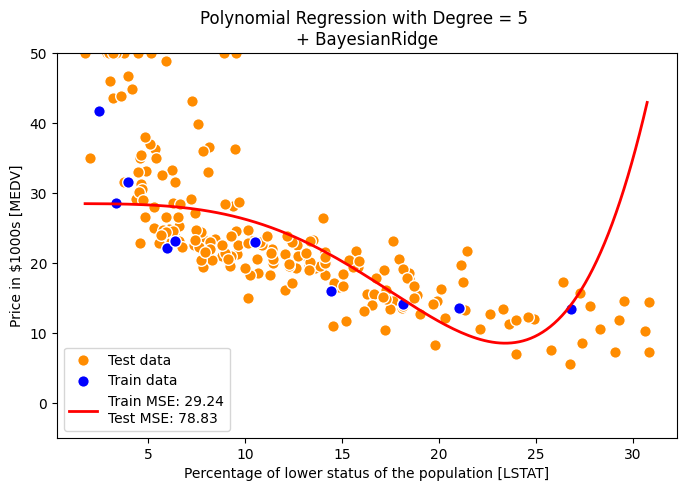

In [10]:
from sklearn.linear_model import BayesianRidge
regr_ridge = BayesianRidge() 
regr_ridge.fit(X_poly, y)
y_poly_fit = regr_ridge.predict(poly.fit_transform(X_fit))
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
plt.scatter(X, y, c='blue', edgecolor='white', s=70 , label='Train data')

poly_mse = mean_squared_error(y, regr_ridge.predict (X_poly))
poly_mse_test = mean_squared_error(y_test, regr_ridge.predict(X_poly_test))
plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse,2), round(poly_mse_test, 2)))
plt.xlabel('Percentage of lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.ylim(-5, 50)
plt.title("Polynomial Regression with Degree = %s \n+ BayesianRidge" % (degree)) 
plt.legend()
plt.show()

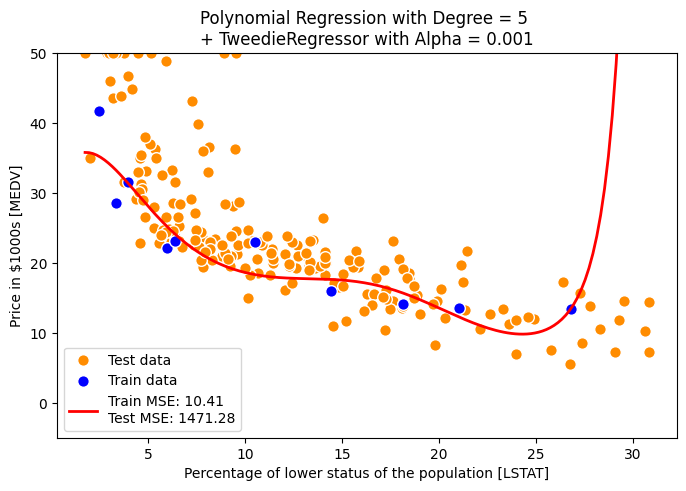

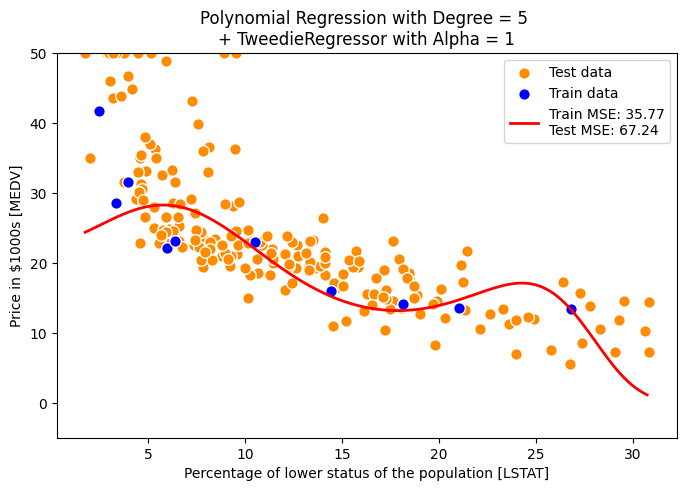

In [11]:
from sklearn.linear_model import TweedieRegressor
alphas = [0.001, 1] 
for alpha in alphas:
    regr_ridge = TweedieRegressor(power = 1, alpha=alpha, link = 'log') 
    regr_ridge.fit(X_poly, y)
    y_poly_fit = regr_ridge.predict(poly.fit_transform(X_fit))
    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
    plt.scatter(X, y, c='blue', edgecolor='white', s=70 , label='Train data')

    poly_mse = mean_squared_error(y, regr_ridge.predict (X_poly))
    poly_mse_test = mean_squared_error(y_test, regr_ridge.predict(X_poly_test))
    plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse,2), round(poly_mse_test, 2)))
    plt.xlabel('Percentage of lower status of the population [LSTAT]')
    plt.ylabel('Price in $1000s [MEDV]')
    plt.ylim(-5, 50)
    plt.title("Polynomial Regression with Degree = %s \n+ TweedieRegressor with Alpha = %s" % (degree, alpha)) 
    plt.legend()
    plt.show()